In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import networkx as nx

#### Figure 2: Relationship between population and number of Reddit users across US states. 

In [4]:
df = pd.read_csv('data/regression_file.csv')
df.head(10)

,state_code,state,lat_centroid,lon_centroid,population_2010,population_2019,gdp per capita (2017),user_count,spatial_diversity_romance_0.99,social_diversity_romance_0.99,...,diversity_social_all_minstrength_1,diversity_social_all_minstrength_2,diversity_social_all_minstrength_3,diversity_social_all_minstrength_4,diversity_social_all_minstrength_5,diversity_spatial_all_minstrength_1,diversity_spatial_all_minstrength_2,diversity_spatial_all_minstrength_3,diversity_spatial_all_minstrength_4,diversity_spatial_all_minstrength_5
0,MI,Michigan,43.326618,-84.536095,9883640,9986857,42631,19226,0.010942,0.010702,...,0.782628,0.691875,0.589508,0.523624,0.468537,0.347165,0.264779,0.197451,0.160281,0.134350
1,IN,Indiana,39.849426,-86.258278,6483802,6732219,44797,8796,0.009145,0.009406,...,0.772698,0.688047,0.581975,0.513241,0.444736,0.334955,0.257399,0.191458,0.151354,0.120397
2,AL,Alabama,32.806671,-86.791130,4779736,4903185,36856,7487,0.010179,0.010759,...,0.773070,0.666816,0.583636,0.526066,0.475101,0.313184,0.233619,0.178420,0.146017,0.119721
3,MA,Massachusetts,42.230171,-71.530106,6547629,6949503,64507,20375,0.012566,0.012096,...,0.804929,0.712849,0.608988,0.545610,0.489975,0.356119,0.271862,0.204504,0.168476,0.141436
4,MO,Missouri,38.456085,-92.288368,5988927,6137428,42943,15367,0.010792,0.010656,...,0.787864,0.696975,0.599421,0.533692,0.473765,0.335388,0.254651,0.190317,0.154763,0.125958
5,MN,Minnesota,45.694454,-93.900192,5303925,5639632,53380,16202,0.012244,0.012268,...,0.793771,0.697725,0.598427,0.537946,0.485336,0.349458,0.262543,0.197873,0.160291,0.132809
6,MD,Maryland,39.063946,-76.802101,5773552,6045680,54894,9327,0.010896,0.010589,...,0.781165,0.695659,0.588948,0.536379,0.471726,0.342680,0.259445,0.193124,0.159882,0.130382
7,FL,Florida,27.766279,-81.686783,18801310,21477737,39093,29351,0.011168,0.011120,...,0.778292,0.686585,0.582209,0.515593,0.456104,0.336789,0.255025,0.190153,0.153972,0.127729
8,OH,Ohio,40.388783,-82.764915,11536504,11689100,46826,19403,0.011033,0.011071,...,0.791397,0.701339,0.603074,0.536780,0.475517,0.339337,0.258404,0.194043,0.156789,0.130538
9,CA,California,36.116203,-119.681564,37254523,39512223,57328,60844,0.014956,0.014683,...,0.818995,0.727907,0.624987,0.557760,0.501567,0.358607,0.269559,0.202110,0.165029,0.137940


Population 2017 not present in the csv file. Found same results using population 2019...

Slope (scaling exponent): 0.963
Intercept (log10 space): -5.817
R²: 0.7930


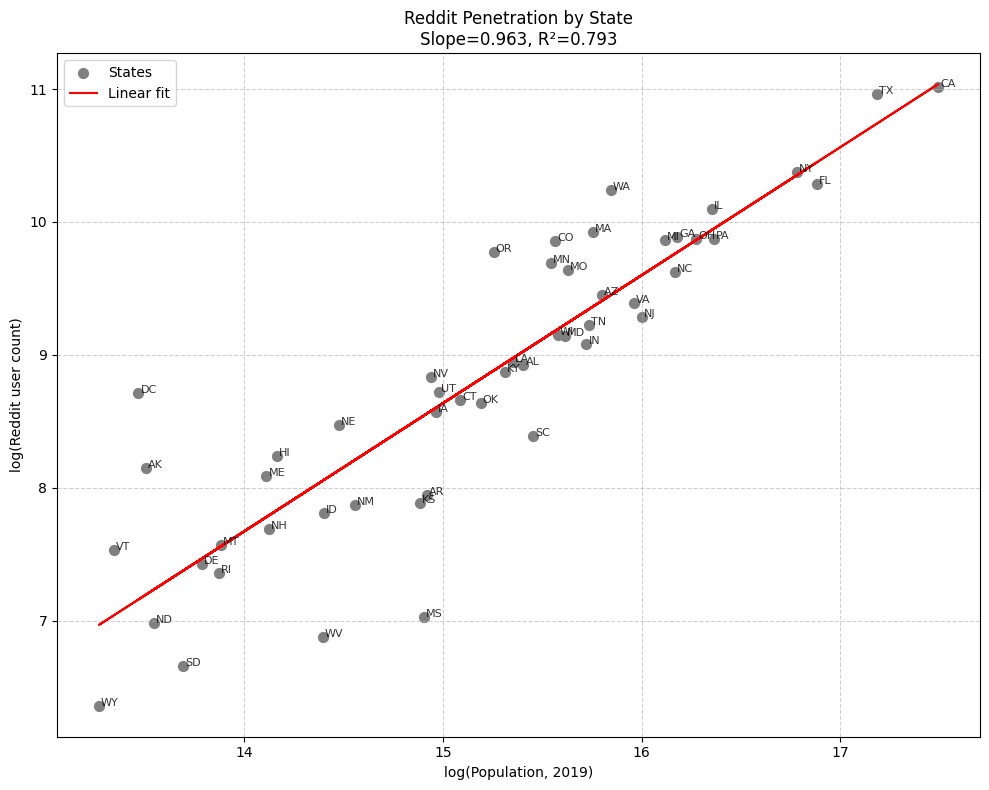

In [4]:
df = df[['state_code', 'state', 'population_2019', 'user_count']].dropna()

df['log_pop'] = np.log(df['population_2019'])
df['log_users'] = np.log(df['user_count'])

X = df[['log_pop']].values
y = df['log_users'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

df['residual'] = y - y_pred
slope = model.coef_[0]
intercept = model.intercept_
r2 = r2_score(y, y_pred)

print(f"Slope (scaling exponent): {slope:.3f}")
print(f"Intercept (log10 space): {intercept:.3f}")
print(f"R²: {r2:.4f}")

plt.figure(figsize=(10, 8))
plt.scatter(df['log_pop'], df['log_users'], color='gray', label='States', s=50)
plt.plot(df['log_pop'], y_pred, color='red', label='Linear fit')

for _, row in df.iterrows():
    plt.text(row['log_pop'] + 0.01, row['log_users'], row['state_code'], fontsize=8, alpha=0.8)

plt.xlabel('log(Population, 2019)')
plt.ylabel('log(Reddit user count)')
plt.title(f'Reddit Penetration by State\nSlope={slope:.3f}, R²={r2:.3f}')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

TO DO: Find states which # users is one st deviation more than the prediction. 

#### Table 1: Linear regressions to predict GDP per capita of US states from: 

a) population density only

b) spatial diversity computed on the full communication graph

c) spatial diversity computed on
dimension-specific communication graphs.

#### Full comunication graph

In [ ]:
dim_df = pd.read_csv('data/reddit_messages_dimensions.csv', sep="|")
dim_df.head(10)

,author,time,dest_author,author_state_code,dest_state_code,support_binary_adaptive_0.5,knowledge_binary_adaptive_0.5,conflict_binary_adaptive_0.5,power_binary_adaptive_0.5,similarity_binary_adaptive_0.5,...,support_binary_adaptive_0.99,knowledge_binary_adaptive_0.99,conflict_binary_adaptive_0.99,power_binary_adaptive_0.99,similarity_binary_adaptive_0.99,fun_binary_adaptive_0.99,status_binary_adaptive_0.99,trust_binary_adaptive_0.99,identity_binary_adaptive_0.99,romance_binary_adaptive_0.99
0,allurex,1.352921e+09,allurex,MO,MO,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,dtrmp4,1.352929e+09,allurex,MI,MO,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,cthompsonguy,1.352949e+09,allurex,IN,MO,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chicken_or_chicken,1.352949e+09,allurex,AL,MO,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,thkmass,1.352963e+09,allurex,MA,MO,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,ips1023,1.354808e+09,allurex,MO,MO,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6,dailyshred,1.354775e+09,allurex,MN,MO,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,aulio,1.346906e+09,allurex,MD,MO,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,kamphius,1.495864e+09,allurex,FL,MO,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,allurex,1.316144e+09,asdfghjkrystal,MO,WA,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [21]:
dim_df.head()

,author,time,dest_author,author_state_code,dest_state_code,support_binary_adaptive_0.5,knowledge_binary_adaptive_0.5,conflict_binary_adaptive_0.5,power_binary_adaptive_0.5,similarity_binary_adaptive_0.5,...,support_binary_adaptive_0.99,knowledge_binary_adaptive_0.99,conflict_binary_adaptive_0.99,power_binary_adaptive_0.99,similarity_binary_adaptive_0.99,fun_binary_adaptive_0.99,status_binary_adaptive_0.99,trust_binary_adaptive_0.99,identity_binary_adaptive_0.99,romance_binary_adaptive_0.99
0,allurex,1.352921e+09,allurex,MO,MO,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,dtrmp4,1.352929e+09,allurex,MI,MO,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,cthompsonguy,1.352949e+09,allurex,IN,MO,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chicken_or_chicken,1.352949e+09,allurex,AL,MO,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,thkmass,1.352963e+09,allurex,MA,MO,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
edge_weights = (
    dim_df.groupby(["author", "dest_author"])
    .size()
    .reset_index(name="weight")
)

# Threshold of 4 
edge_weights = edge_weights[edge_weights["weight"] >= 4]

In [17]:
G = nx.DiGraph()

for _, row in edge_weights.iterrows():
    G.add_edge(row["author"], row["dest_author"], weight=row["weight"])

print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

Graph has 117163 nodes and 277204 edges


#### Communication specific graphs...

In [18]:
dimensions = [
    "support", "knowledge", "conflict", "power",
    "similarity", "fun", "status", "trust",
    "identity", "romance"
]

In [21]:
graphs = {}

for dim in dimensions:
    col = f"{dim}_binary_adaptive_0.99" 
    df = dim_df[dim_df[col] == 1]

    edges = (
        df.groupby(["author", "dest_author"])
        .size()
        .reset_index(name="weight")
    )

    Gd = nx.DiGraph()
    for _, row in edges.iterrows():
        Gd.add_edge(row["author"], row["dest_author"], weight=row["weight"])

    graphs[dim] = Gd

3m 34sec..

#### Computing diversity of interactions

# Reproducing TABLE 1 

The table involves building state-level spatial diversity metrics and then running regressions.

The table compares 3 regressions:

a) GDP per capita ~ population density
b) GDP per capita ~ spatial diversity (full graph)
c) GDP per capita ~ spatial diversity (dimension-specific graphs)


In [50]:
#approaching TABLE 1 recreation
import pandas as pd

df_reg = pd.read_csv('data/regression_file.csv')

# compute population density (2019 population / state area)
state_area_km2 = {
    "AL": 131170,   # Alabama
    "AK": 1723337,  # Alaska
    "AZ": 295234,   # Arizona
    "AR": 137732,   # Arkansas
    "CA": 423967,   # California
    "CO": 269601,   # Colorado
    "CT": 14357,    # Connecticut
    "DE": 6446,     # Delaware
    "FL": 170312,   # Florida
    "GA": 153910,   # Georgia
    "HI": 28313,    # Hawaii
    "ID": 216443,   # Idaho
    "IL": 149995,   # Illinois
    "IN": 94326,    # Indiana
    "IA": 145746,   # Iowa
    "KS": 213100,   # Kansas
    "KY": 104656,   # Kentucky
    "LA": 135659,   # Louisiana
    "ME": 91633,    # Maine
    "MD": 32131,    # Maryland
    "MA": 27336,    # Massachusetts
    "MI": 250487,   # Michigan
    "MN": 225163,   # Minnesota
    "MS": 125438,   # Mississippi
    "MO": 180540,   # Missouri
    "MT": 380831,   # Montana
    "NE": 200330,   # Nebraska
    "NV": 286380,   # Nevada
    "NH": 24214,    # New Hampshire
    "NJ": 22591,    # New Jersey
    "NM": 314917,   # New Mexico
    "NY": 141297,   # New York
    "NC": 139391,   # North Carolina
    "ND": 183108,   # North Dakota
    "OH": 116098,   # Ohio
    "OK": 181037,   # Oklahoma
    "OR": 254806,   # Oregon
    "PA": 119280,   # Pennsylvania
    "RI": 4001,     # Rhode Island
    "SC": 82933,    # South Carolina
    "SD": 199729,   # South Dakota
    "TN": 109153,   # Tennessee
    "TX": 695662,   # Texas
    "UT": 219882,   # Utah
    "VT": 24906,    # Vermont
    "VA": 110787,   # Virginia
    "WA": 184661,   # Washington
    "WV": 62756,    # West Virginia
    "WI": 169635,   # Wisconsin
    "WY": 253335,   # Wyoming
    "DC": 177       # District of Columbia (optional)
}

df_reg["area_km2"] = df_reg["state_code"].map(state_area_km2)
df_reg["population_density"] = df_reg["population_2019"] / df_reg["area_km2"]


In [51]:
df_reg.head()

,state_code,state,lat_centroid,lon_centroid,population_2010,population_2019,gdp per capita (2017),user_count,spatial_diversity_romance_0.99,social_diversity_romance_0.99,...,diversity_social_all_minstrength_3,diversity_social_all_minstrength_4,diversity_social_all_minstrength_5,diversity_spatial_all_minstrength_1,diversity_spatial_all_minstrength_2,diversity_spatial_all_minstrength_3,diversity_spatial_all_minstrength_4,diversity_spatial_all_minstrength_5,area_km2,population_density
0,MI,Michigan,43.326618,-84.536095,9883640,9986857,42631,19226,0.010942,0.010702,...,0.589508,0.523624,0.468537,0.347165,0.264779,0.197451,0.160281,0.134350,250487,39.869762
1,IN,Indiana,39.849426,-86.258278,6483802,6732219,44797,8796,0.009145,0.009406,...,0.581975,0.513241,0.444736,0.334955,0.257399,0.191458,0.151354,0.120397,94326,71.371827
2,AL,Alabama,32.806671,-86.791130,4779736,4903185,36856,7487,0.010179,0.010759,...,0.583636,0.526066,0.475101,0.313184,0.233619,0.178420,0.146017,0.119721,131170,37.380384
3,MA,Massachusetts,42.230171,-71.530106,6547629,6949503,64507,20375,0.012566,0.012096,...,0.608988,0.545610,0.489975,0.356119,0.271862,0.204504,0.168476,0.141436,27336,254.225307
4,MO,Missouri,38.456085,-92.288368,5988927,6137428,42943,15367,0.010792,0.010656,...,0.599421,0.533692,0.473765,0.335388,0.254651,0.190317,0.154763,0.125958,180540,33.994838


In [52]:
#prepare state-level edges

state_edges = (
    dim_df.groupby(["author_state_code", "dest_state_code"])
    .size()
    .reset_index(name="weight")
)

state_edges = state_edges[state_edges["author_state_code"] != ""]  # drop missing


state_edges.shape
state_edges.head()


,author_state_code,dest_state_code,weight
0,AK,AK,8837
1,AK,AL,594
2,AK,AR,332
3,AK,AZ,1005
4,AK,CA,6572


In [53]:
def spatial_diversity(df_edges):
    """
    Compute normalized entropy of outgoing weights per source_state.
    Returns: DataFrame [state_code, D_spatial]
    """
    diversities = []
    for state, grp in df_edges.groupby("author_state_code"):
        weights = grp["weight"].values
        p = weights / weights.sum()
        S = len(weights)
        if S <= 1:
            D = 0
        else:
            D = -np.sum(p * np.log(p)) / np.log(S)
        diversities.append((state, D))
    return pd.DataFrame(diversities, columns=["state_code", "D_spatial_all"])

D_all = spatial_diversity(state_edges)


In [54]:
D_all.head()

,state_code,D_spatial_all
0,AK,0.843882
1,AL,0.799454
2,AR,0.860644
3,AZ,0.823225
4,CA,0.764638


In [55]:
D_dims = {}
for dim in ["knowledge", "support"]:
    col = f"{dim}_binary_adaptive_0.99"
    df_dim = dim_df[dim_df[col] == 1]
    state_edges_dim = (
        df_dim.groupby(["author_state_code", "dest_state_code"])
        .size()
        .reset_index(name="weight")
    )
    D_dims[dim] = spatial_diversity(state_edges_dim).rename(
        columns={"D_spatial_all": f"D_spatial_{dim}"}
    )

D_knowledge = D_dims["knowledge"]
D_support = D_dims["support"]


In [56]:
D_knowledge.head()

,state_code,D_spatial_knowledge
0,AK,0.848998
1,AL,0.790749
2,AR,0.875882
3,AZ,0.817230
4,CA,0.746506


In [57]:
D_support.head()

,state_code,D_spatial_support
0,AK,0.817426
1,AL,0.769908
2,AR,0.847324
3,AZ,0.809015
4,CA,0.751577


In [58]:
df_reg = (
    df_reg.merge(D_all, on="state_code", how="left")
           .merge(D_knowledge, on="state_code", how="left")
           .merge(D_support, on="state_code", how="left")
)


In [59]:
df_reg.head()

,state_code,state,lat_centroid,lon_centroid,population_2010,population_2019,gdp per capita (2017),user_count,spatial_diversity_romance_0.99,social_diversity_romance_0.99,...,diversity_spatial_all_minstrength_1,diversity_spatial_all_minstrength_2,diversity_spatial_all_minstrength_3,diversity_spatial_all_minstrength_4,diversity_spatial_all_minstrength_5,area_km2,population_density,D_spatial_all,D_spatial_knowledge,D_spatial_support
0,MI,Michigan,43.326618,-84.536095,9883640,9986857,42631,19226,0.010942,0.010702,...,0.347165,0.264779,0.197451,0.160281,0.134350,250487,39.869762,0.819255,0.805523,0.802428
1,IN,Indiana,39.849426,-86.258278,6483802,6732219,44797,8796,0.009145,0.009406,...,0.334955,0.257399,0.191458,0.151354,0.120397,94326,71.371827,0.829962,0.819474,0.813751
2,AL,Alabama,32.806671,-86.791130,4779736,4903185,36856,7487,0.010179,0.010759,...,0.313184,0.233619,0.178420,0.146017,0.119721,131170,37.380384,0.799454,0.790749,0.769908
3,MA,Massachusetts,42.230171,-71.530106,6547629,6949503,64507,20375,0.012566,0.012096,...,0.356119,0.271862,0.204504,0.168476,0.141436,27336,254.225307,0.795059,0.782339,0.799340
4,MO,Missouri,38.456085,-92.288368,5988927,6137428,42943,15367,0.010792,0.010656,...,0.335388,0.254651,0.190317,0.154763,0.125958,180540,33.994838,0.793527,0.784236,0.782014


In [66]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.stattools import durbin_watson
import pandas as pd

# --- Helper function for standardized OLS ---
def standardized_ols(y, X):
    scaler = StandardScaler()
    X_std = scaler.fit_transform(X)
    y_std = (y - y.mean()) / y.std()
    X_std = sm.add_constant(X_std)
    model = sm.OLS(y_std, X_std).fit(cov_type="HC3")  # robust SE
    return model

# --- Define models according to the paper ---
y = df_reg["gdp per capita (2017)"].values

# (a) baseline
X_a = df_reg[["population_density"]]

# (b) full-graph spatial diversity
X_b = df_reg[["population_density", "D_spatial_all"]]

# (c) dimension-specific (knowledge + support)
X_c = df_reg[[
    "population_density",
    "D_spatial_knowledge",
    "D_spatial_support",
]]

# --- Fit models ---
models = {
    "Baseline": standardized_ols(y, X_a),
    "Full graph": standardized_ols(y, X_b),
    "Dim-specific": standardized_ols(y, X_c),
}

# --- Summarize results ---
results = []

for name, model in models.items():
    # Safely get variable names (handles both Series and ndarray)
    try:
        var_names = model.params.index
    except AttributeError:
        var_names = [f"x{i}" for i in range(len(model.params))]

    for i, var in enumerate(var_names):
        if var == "const" or i == 0:  # skip intercept
            continue
        results.append({
            "Model": name,
            "Variable": var,
            "β": round(float(model.params[i]), 3),
            "Std. Err.": round(float(model.bse[i]), 3),
            "p": round(float(model.pvalues[i]), 3),
            "Adj R²": round(float(model.rsquared_adj), 3),
            "DW": round(float(durbin_watson(model.resid)), 2)
        })

table1 = pd.DataFrame(results)
print("\n=== Table 1: Regression Results (Standardized) ===\n")
print(table1.to_string(index=False))





=== Table 1: Regression Results (Standardized) ===

       Model Variable      β  Std. Err.     p  Adj R²   DW
    Baseline       x1  0.884      0.405 0.029   0.776 2.18
  Full graph       x1  0.885      0.383 0.021   0.779 2.18
  Full graph       x2 -0.081      0.069 0.237   0.779 2.18
Dim-specific       x1  0.882      0.434 0.042   0.769 2.18
Dim-specific       x2 -0.051      0.192 0.792   0.769 2.18
Dim-specific       x3  0.002      0.188 0.994   0.769 2.18


In [48]:
import statsmodels.api as sm

# Helper
def run_regression(X, y):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model

y = df_reg["gdp per capita (2017)"]

# (a) baseline
m1 = run_regression(df_reg[["population_density"]], y)

# (b) full-graph
m2 = run_regression(df_reg[["population_density", "D_spatial_all"]], y)

# (c) dimension-specific
m3 = run_regression(df_reg[["population_density", "D_spatial_knowledge", "D_spatial_support"]], y)

for i, m in enumerate([m1, m2, m3], start=1):
    print(f"\nModel {i}")
    print(m.summary())



Model 1
                              OLS Regression Results                             
Dep. Variable:     gdp per capita (2017)   R-squared:                       0.783
Model:                               OLS   Adj. R-squared:                  0.778
Method:                    Least Squares   F-statistic:                     176.4
Date:                   Mon, 27 Oct 2025   Prob (F-statistic):           7.35e-18
Time:                           16:28:07   Log-Likelihood:                -532.47
No. Observations:                     51   AIC:                             1069.
Df Residuals:                         49   BIC:                             1073.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------